Due 11:30am Wednesday February 1st
Use "import numpy.polynomial.legendre as lpoly" to load the module for working with Legendre polynomials.  
1) plot the first 5 legendre polynomials between -1 and +1 (like Chebychev polynomials in assignment #1)  
2) use "numpy.optimize.brentq" to determine the zeros of the 5th order Legendre polynomial  
3) write a function to find zeros using the "secant method" as described in https://en.wikipedia.org/wiki/Secant_method.  This is essentially the same as Newton's method, but uses a discrete approximation for the derivative.  
4) apply your function to determine the zeros of the 5th order Legendre polynomial

Gisu Ham 10134838  
Justin Park 10115894

In [1]:
import numpy.polynomial.legendre as lpoly
from scipy.optimize import brentq
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

# 1

In [2]:
def plot_leg(n,legend): 
    #this function plots legendre polynomial from order 0 to order n.
    # legend=1 plots the legends, legend=0 do not plot the legends
    x=[] # this is the list of x values
    for i in range(-100,101,1):
        x.append(i/100)
    c=[] #this list is used as an argument for for the legendre polynomial function in the form [a,b,c,d...] equals the coefficients of linear combination of legendre polynomials. 
    for i in range(0,1000): #creating list
        c.append(0)
    for n in range(0,n): #removing 0 from n-1 coefficient, and adding 1 to n coefficient to get the next legendre polynomial
        y=[]
        c.pop(n)
        c.insert(n,1)
        for m in x:
            y.append(lpoly.legval(m,c,tensor=True))
        c.pop(n)
        c.insert(n,0)
        plt.plot(x,y,label="n="+str(n))

    if legend==1:  
        plt.legend(loc=4)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Legendre Polynomials of Different Order n')
    # The x and y axis for the Chebyshev Polynomials are dimensionless, so a blank label is appropriate for this case.
    plt.show()

In [142]:
assert(lpoly.legval(-1,[1],tensor=True)==1.0)
assert(lpoly.legval(-1,[0,1],tensor=True)==-1.0)
assert(lpoly.legval(-1,[0,0,1],tensor=True)==1.0)
assert(lpoly.legval(-1,[0,0,0,1],tensor=True)==-1.0)

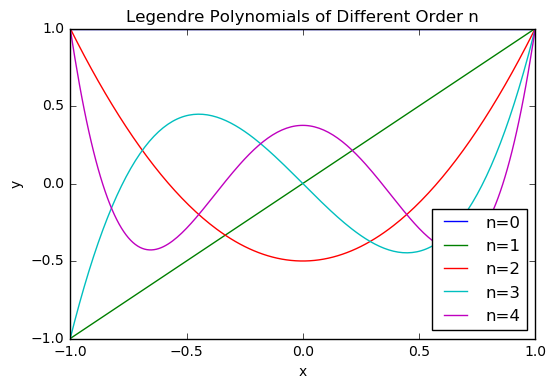

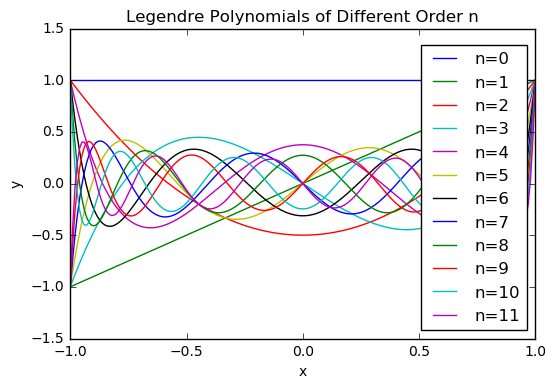

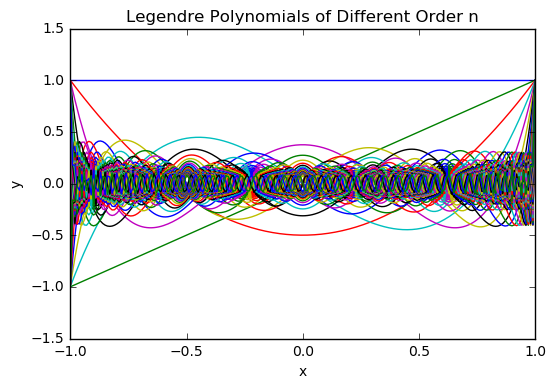

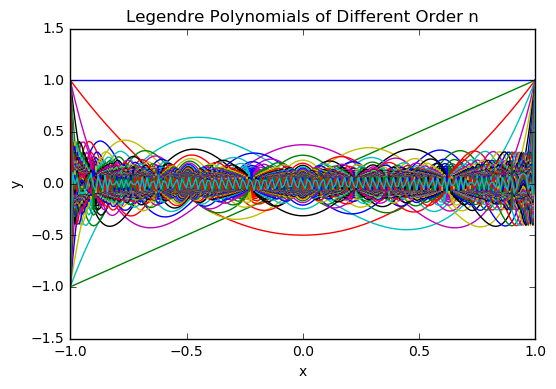

In [127]:
plot_leg(5,1)
#plot_leg(12,1)
#plot_leg(100,0)
#plot_leg(200,0)
# DO NOT RUN 200,100.

# 2

In [3]:
def lpoly5(x): # this function is the function of the 5th order legendre polynomial
    return lpoly.legval(x,[0,0,0,0,0,1],tensor=True)

#below are the roots of the 5th order legendre polynomial. In general, this should be done in a loop, but since
#the roots are easily identifiable in our case by looking at the plot, we decided to specify the ranges using brute force.
print("These are the roots for the 5th order Legendre polynomial:")
print("x=",brentq(lpoly5,-1.0,-0.6,xtol=1.0e-14,rtol=1.0e-14,maxiter=1000,full_output=False,disp=True))
print("x=",brentq(lpoly5,-0.6,-0.4,xtol=1.0e-14,rtol=1.0e-14,maxiter=1000,full_output=False,disp=True))
print("x=",brentq(lpoly5,-0.2,0.2,xtol=1.0e-14,rtol=1.0e-14,maxiter=1000,full_output=False,disp=True))
print("x=",brentq(lpoly5,0.4,0.6,xtol=1.0e-14,rtol=1.0e-14,maxiter=1000,full_output=False,disp=True))
print("x=",brentq(lpoly5,0.7,1.0,xtol=1.0e-14,rtol=1.0e-14,maxiter=1000,full_output=False,disp=True))

These are the roots for the 5th order Legendre polynomial:
x= -0.906179845938664
x= -0.5384693101056829
x= 0.0
x= 0.5384693101056829
x= 0.906179845938664


# 3

In [4]:
def sec_rec(f,x_1,x_2,n):
    #this function is the recursion relation of the secant method that takes two base case, x_2,x_1 and iterates the
    #algorithm n times. The possibility of zero division is resolved by creating a loop in secant_approx function
    if n==1:
        return x_1
    elif n==2:
        return x_2
    else:
        return sec_rec(f,x_1,x_2,n-1)-f(sec_rec(f,x_1,x_2,n-1))*((sec_rec(f,x_1,x_2,n-1)-sec_rec(f,x_1,x_2,n-2))/(f(sec_rec(f,x_1,x_2,n-1))-f(sec_rec(f,x_1,x_2,n-2))))

def secant_approx(f,a,b):
    #this function spits out the complete roots by using the sec_rec mid way
    image=[] #stores all the x,y values as[x,y]
    specialimage=[] #stores all the x1,y1,x2,y2 values as [x1,y1,x2,y2] for points near the roots
    root=[] #list of roots.
    
    #The original plan was to include finding root at the end points, but user just simply has to increase
    #the domain to find more roots. so currently disabled the 4 lines below
    #if f(a)==0:
    #    root.append([a,f(a)])
    #if f(b)==0:
    #    root.append([b,f(b)])
    for i in range(a*50000,b*50000,1):
        image.append([i/50000,f(i/50000)]) 
    
    for i in range(0,len(image)-2):  #this loop tests all the x,y values and append points near the roots into specialimage
        if image[i][1]*image[i+1][1]>0 and image[i+1][1]*image[i+2][1]<=0:
            specialimage.append([image[i+1][0],image[i+1][1],image[i+2][0],image[i+2][1]])
        else:
            None
    for i in range(0,len(specialimage)):
        #failed to get the 'except' code working for division error at high number of iterations forthe recursion 
        #for n in range(1,5):
        #    try:
        #        sec_rec(f,specialimage[i][0],specialimage[i][2],n)
        #        print(sec_rec(f,specialimage[i][0],specialimage[i][2],n))
        #    except:
        #        root.append(sec_rec(f,specialimage[i][0],specialimage[i][2],n-1))
        #        print("smnukh",sec_rec(f,specialimage[i][0],specialimage[i][2],n-1)) 
        root.append(sec_rec(f,specialimage[i][0],specialimage[i][2],3))
    for i in range(0,len(root)):
        print("root #",i,":",root[i])
    return 

# 4

In [5]:
secant_approx(lpoly5,-1,1) #running the function in 3 on legendre polynomial of order 5

root # 0 : -0.906179845923
root # 1 : -0.53846931003
root # 2 : 0.0
root # 3 : 0.53846931003
root # 4 : 0.906179845923
